## 拟合加入正则化

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

创建一些随机数据

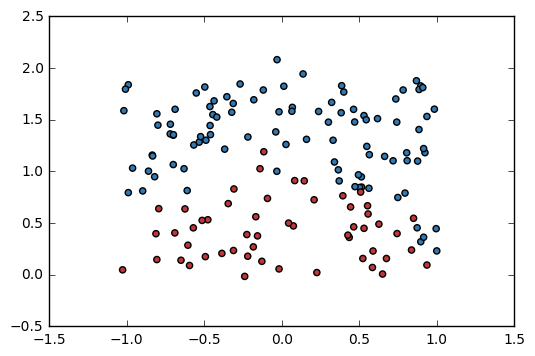

In [3]:
data = []
label = []
np.random.seed(1)

for i in range(150):
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(0, 2)
    if x1 ** 2 + x2 ** 2 <= 1:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.1)])
        label.append(0)
    else:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.1)])
        label.append(1)

data = np.array(data)
label = np.array(label).reshape(-1, 1)

plt.scatter(data[:, 0], data[:, 1], c=label, cmap='RdBu', vmin=-.2, vmax=1.2)

定义一个权重函数

In [4]:
def get_weight(shape, lambda1):
    weight = tf.Variable(tf.random_normal(shape, dtype=tf.float32))
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambda1)(weight))
    return weight

构建五层全连接层

In [5]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])
y_output = tf.placeholder(dtype=tf.float32, shape=[None, 1])

layer_dimension = [2, 10, 5, 3, 1]
input_dimention = layer_dimension[0]
cur_layer = x_input

for i in range(1, len(layer_dimension)):
    output_dimention = layer_dimension[i]
    weight = get_weight([input_dimention, output_dimention], 0.003)
    bias = tf.Variable(tf.constant(0.1, shape=[output_dimention]))
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)
    input_dimention = output_dimention

y_pred = cur_layer

### 使用MSE损失函数

In [6]:
# 定义MSE损失
mse_loss = tf.reduce_mean(tf.square(y_output - y_pred))

# 将mse_loss加入集合losses
tf.add_to_collection('losses', mse_loss)
loss = tf.add_n(tf.get_collection('losses'))

train_step1 = tf.train.AdamOptimizer(0.001).minimize(mse_loss)
# 首先使用MSE损失
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(40001):
        sess.run(train_step1, feed_dict={x_input: data, y_output: label})
        if step % 2000 == 0:
            print('After %d step(s), mse_loss is %s' %
                  (step, sess.run(mse_loss, feed_dict={x_input: data, y_output: label})))

    xx, yy = np.mgrid[-1.2: 1.2: .01, -0.5: 2.5: .01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y_pred, feed_dict={x_input: grid})
    probs = probs.reshape(xx.shape)

After 0 step(s), mse_loss is 12.7913
After 2000 step(s), mse_loss is 0.0468237
After 4000 step(s), mse_loss is 0.0304502
After 6000 step(s), mse_loss is 0.026482
After 8000 step(s), mse_loss is 0.0242563
After 10000 step(s), mse_loss is 0.0168036
After 12000 step(s), mse_loss is 0.0105441
After 14000 step(s), mse_loss is 0.00801657
After 16000 step(s), mse_loss is 0.00783318
After 18000 step(s), mse_loss is 0.00774703
After 20000 step(s), mse_loss is 0.0076915
After 22000 step(s), mse_loss is 0.00766059
After 24000 step(s), mse_loss is 0.00764405
After 26000 step(s), mse_loss is 0.00763613
After 28000 step(s), mse_loss is 0.00762697
After 30000 step(s), mse_loss is 0.00762076
After 32000 step(s), mse_loss is 0.00764514
After 34000 step(s), mse_loss is 0.00762224
After 36000 step(s), mse_loss is 0.0076167
After 38000 step(s), mse_loss is 0.00762133
After 40000 step(s), mse_loss is 0.00761977


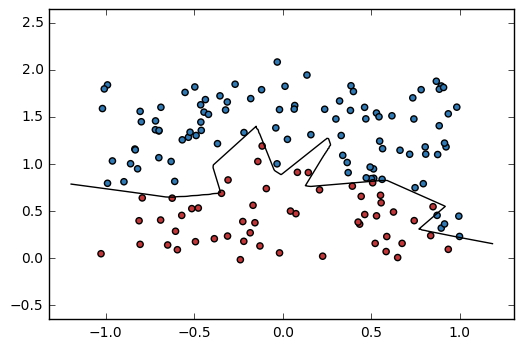

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=label, cmap='RdBu', vmin=-.2, vmax=1.2)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)

### 使用L2正则化的损失函数

In [8]:
train_step2 = tf.train.AdamOptimizer(0.001).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(40001):
        sess.run(train_step2, feed_dict={x_input: data, y_output: label})
        if step % 2000 == 0:
            print('After %d step(s), mse_loss is %s' %
                  (step, sess.run(loss, feed_dict={x_input: data, y_output: label})))

    xx, yy = np.mgrid[-1.2: 1.2: .01, -0.5: 2.5: .01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y_pred, feed_dict={x_input: grid})
    probs = probs.reshape(xx.shape)

After 0 step(s), mse_loss is 2.8759
After 2000 step(s), mse_loss is 0.0582418
After 4000 step(s), mse_loss is 0.0486985
After 6000 step(s), mse_loss is 0.0456964
After 8000 step(s), mse_loss is 0.042651
After 10000 step(s), mse_loss is 0.0408539
After 12000 step(s), mse_loss is 0.0399573
After 14000 step(s), mse_loss is 0.0398152
After 16000 step(s), mse_loss is 0.0398097
After 18000 step(s), mse_loss is 0.0398083
After 20000 step(s), mse_loss is 0.0398097
After 22000 step(s), mse_loss is 0.0398057
After 24000 step(s), mse_loss is 0.0398097
After 26000 step(s), mse_loss is 0.0398075
After 28000 step(s), mse_loss is 0.0398146
After 30000 step(s), mse_loss is 0.0398083
After 32000 step(s), mse_loss is 0.0398097
After 34000 step(s), mse_loss is 0.0398122
After 36000 step(s), mse_loss is 0.0398114
After 38000 step(s), mse_loss is 0.0398097
After 40000 step(s), mse_loss is 0.0398092


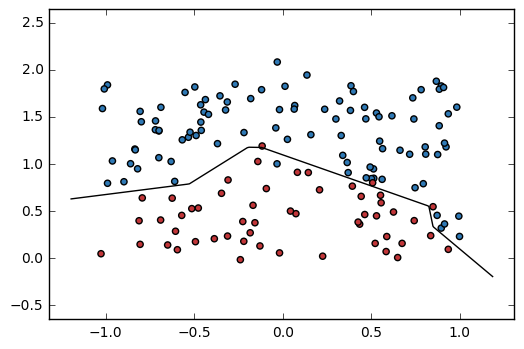

In [9]:
plt.scatter(data[:, 0], data[:, 1], c=label, cmap='RdBu', vmin=-.2, vmax=1.2)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)